In [1]:
import numpy as np
%matplotlib inline
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns



In [2]:
data = pd.read_csv('citrus.csv')
data_labels = data.iloc[:, 0].values
data_features = data.iloc[:, 1:].values

In [3]:
data_features

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df = pd.DataFrame({
    'diameter': data_features[:, 0],
    'weight': data_features[:, 1],
    'red': data_features[:, 2],
    'green': data_features[:, 3],
    'blue': data_features[:, 4],
    'label': data_labels
})


fig = px.scatter_matrix(df,
                        dimensions=['diameter', 'weight', 'red', 'green', 'blue'],
                        color='label')
fig.show()

In [6]:

fig = px.scatter_3d(df, x='diameter', y='weight', z='red', 
                    color='label',
                    title='3D Scatter Plot - diameter vs weight vs red color')
fig.show()


In [7]:
fig = px.scatter_3d(df, x='diameter', y='weight', z='green', 
                    color='label',
                    title='3D Scatter Plot - diameter vs weight vs green color')
fig.show()

In [8]:
fig = px.scatter_3d(df, x='diameter', y='weight', z='blue', 
                    color='label',
                    title='3D Scatter Plot - diameter vs weight vs blue color')
fig.show()

In [9]:
fig = px.scatter_3d(df, x='red', y='green', z='blue', 
                    color='label',
                    title='3D Scatter Plot - red vs green vs blue color')
fig.show()

In [10]:
features = data_features
labels = data_labels

 Classical Machine Learning Model

In [11]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [12]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)

In [13]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.93
Classical SVC on the test dataset:     0.93


Quantum Machine Learning Model

In [14]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]
num_features


5

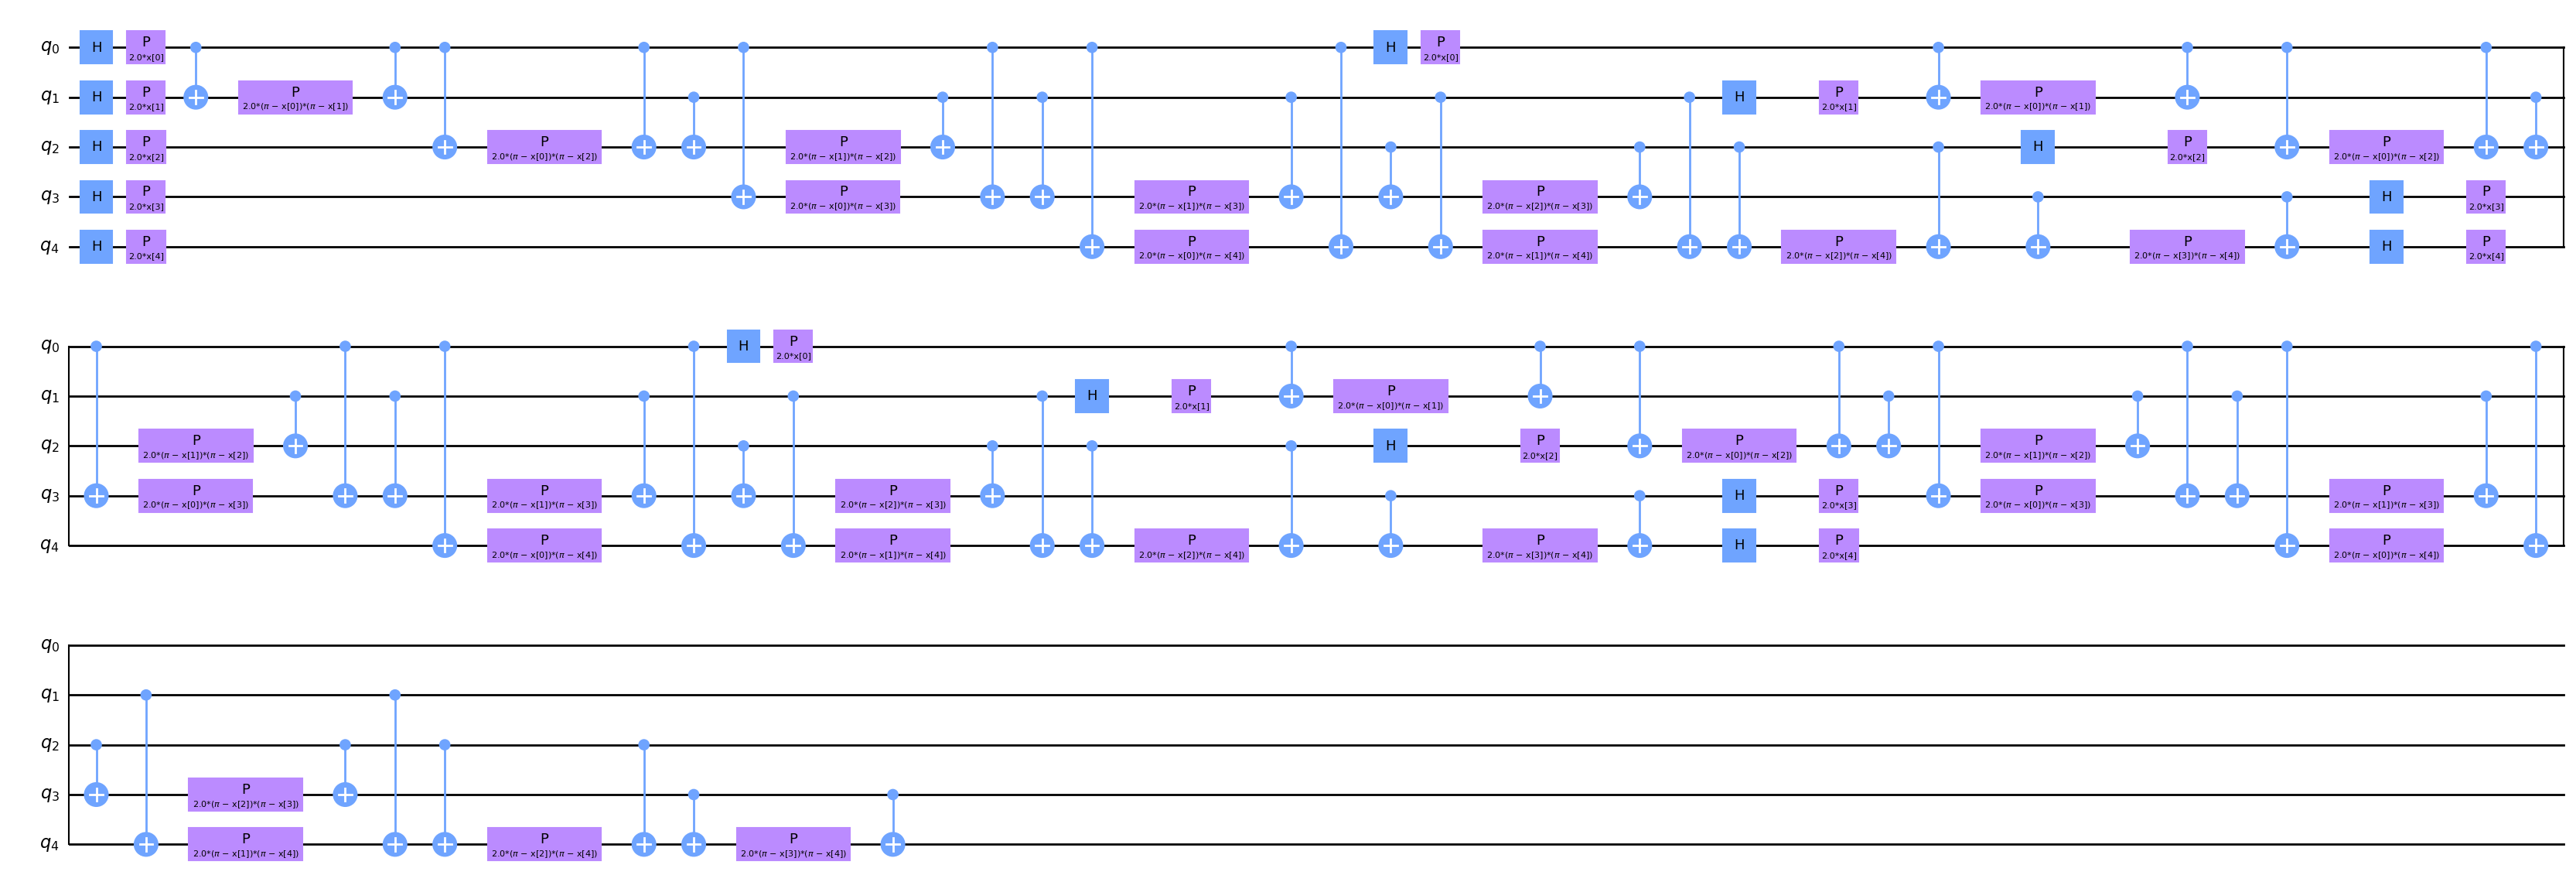

In [15]:
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=3)
feature_map.decompose().draw(output="mpl", style="clifford", fold=50)

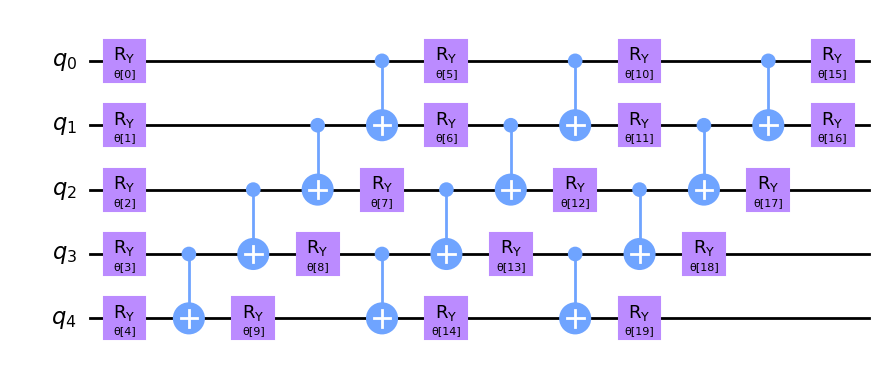

In [16]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=50)

In [17]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=50)

In [18]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [19]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

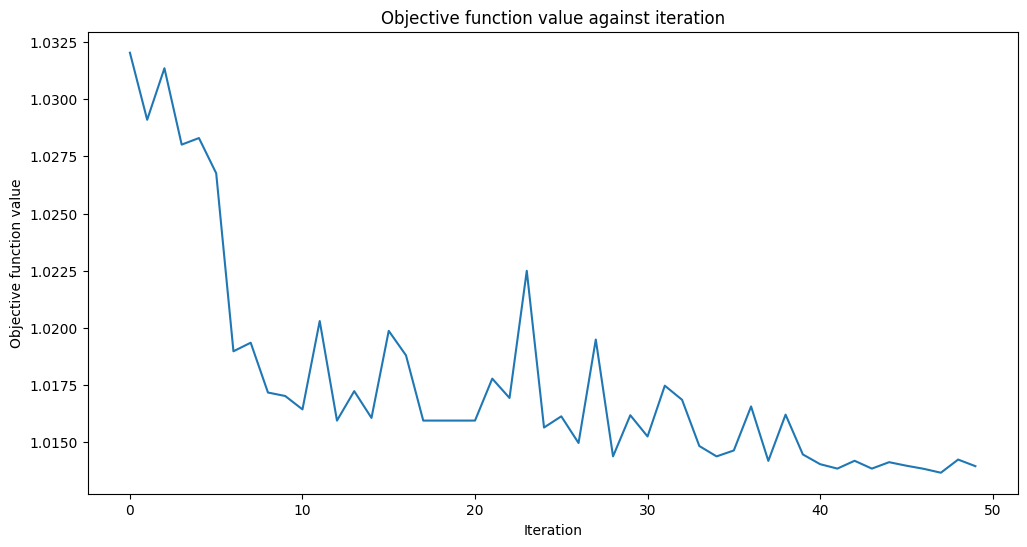

Training time: 1352 seconds


In [20]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [21]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.51
Quantum VQC on the test dataset:     0.50
